#MVP da Disciplina ESSI - Aluna: Priscylla Muniz Moraes

# **Estimativa de Níveis de Obesidade com Base no Estilo de Vida**

Este trabalho propõe o desenvolvimento de um modelo de aprendizado de máquina capaz de prever o nível de obesidade de uma pessoa com base em seus hábitos alimentares, pessoais e rotina.

Para isso, foi utilizado um conjunto de dados público, disponível no repositório da UCI (University of California Irvine): https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition




## 1 Importação das Bibliotecas e Carregamento dos Dados
Importação das bibliotecas necessárias e carregamento do conjunto de dados a partir de um arquivo CSV hospedado no **GitHub**.

O dataset é composto pelas seguintes variáveis numéricas e categóricas:


| Variável   | Tipo       | Descrição                                                                 |
|------------|------------|---------------------------------------------------------------------------|
| Gender     | Categórica | Gênero biológico do indivíduo (masculino ou feminino)                    |
| Age        | Numérica   | Idade da pessoa em anos                                                  |
| Height     | Numérica   | Altura da pessoa em metros                                               |
| Weight     | Numérica   | Peso da pessoa em quilogramas                                            |
| FHWO       | Categórica | Algum membro da família sofre ou sofreu com sobrepeso?                  |
| FAVC       | Categórica | Você consome alimentos com alto teor calórico com frequência?           |
| FCVC       | Numérica   | Frequência com que você consome vegetais em suas refeições              |
| NCP        | Numérica   | Número de refeições principais realizadas por dia                       |
| CAEC       | Categórica | Frequência com que você come entre as refeições                         |
| SMOKE      | Categórica | Você fuma?                                                               |
| CH2O       | Numérica   | Quantidade de água ingerida por dia (em litros, aproximadamente)        |
| SCC        | Categórica | Você monitora as calorias que consome diariamente?                      |
| FAF        | Numérica   | Frequência semanal de prática de atividade física                       |
| TUE        | Numérica   | Tempo médio de uso diário de tecnologia (TV, computador, celular etc.)  |
| CALC       | Categórica | Frequência de consumo de bebidas alcoólicas                             |
| MTRANS     | Categórica | Meio de transporte predominante utilizado pela pessoa                   |
| NObeyesdad | Categórica | Nível de obesidade identificado pelo sistema (classe-alvo da previsão)  |


In [61]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
import joblib

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [62]:
# URL do CSV no GitHub
url = "https://raw.githubusercontent.com/priscyllammoraes/mvp_essi/main/ObesityDataSet_raw_and_data_sinthetic.csv"

# Leitura do dataset
dataset = pd.read_csv(url)

# Visualização inicial
dataset.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [63]:
# Verifica as dimensões do dataset
print(f"O dataset possui {dataset.shape[0]} linhas e {dataset.shape[1]} colunas, cujas caracteristicas estão apresentadas abaixo:")

# Informações gerais
dataset.info()

O dataset possui 2111 linhas e 17 colunas, cujas caracteristicas estão apresentadas abaixo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2111 non-null   object 
 1   Age         2111 non-null   float64
 2   Height      2111 non-null   float64
 3   Weight      2111 non-null   float64
 4   FHWO        2111 non-null   object 
 5   FAVC        2111 non-null   object 
 6   FCVC        2111 non-null   float64
 7   NCP         2111 non-null   float64
 8   CAEC        2111 non-null   object 
 9   SMOKE       2111 non-null   object 
 10  CH2O        2111 non-null   float64
 11  SCC         2111 non-null   object 
 12  FAF         2111 non-null   float64
 13  TUE         2111 non-null   float64
 14  CALC        2111 non-null   object 
 15  MTRANS      2111 non-null   object 
 16  NObeyesdad  2111 non-null   object 
dtypes: float64(8), ob

## 2 Análise Exploratória

Antes de iniciar a preparação e a modelagem dos dados, foi feita uma análise inicial para entender a estrutura dos dados e identificar possíveis ajustes necessários no dataset.

### 2.1 Caracteristicas dos Dados

In [66]:
# Cria um resumo de dados do dataset
resumo = []

for col in dataset.columns:
    valores_unicos = dataset[col].unique()
    tipo = dataset[col].dtype
    not_null = dataset[col].isnull().sum()
    qtd_valores = len(valores_unicos)
    amostra = valores_unicos[:8]
    resumo.append({
        'Coluna': col,
        'Tipo': tipo,
        'Valores Nulos': not_null,
        'Valores Únicos': qtd_valores,
        'Amostra de Valores': amostra
    })

# Cria e exibe a tabela
resumo_df = pd.DataFrame(resumo)
resumo_df


,Coluna,Tipo,Valores Nulos,Valores Únicos,Amostra de Valores
0,Gender,object,0,2,"[Female, Male]"
1,Age,float64,0,1402,"[21.0, 23.0, 27.0, 22.0, 29.0, 24.0, 26.0, 41.0]"
2,Height,float64,0,1574,"[1.62, 1.52, 1.8, 1.78, 1.5, 1.64, 1.72, 1.85]"
3,Weight,float64,0,1525,"[64.0, 56.0, 77.0, 87.0, 89.8, 53.0, 55.0, 68.0]"
4,FHWO,object,0,2,"[yes, no]"
5,FAVC,object,0,2,"[no, yes]"
6,FCVC,float64,0,810,"[2.0, 3.0, 1.0, 2.450218, 2.880161, 2.00876, 2.596579, 2.591439]"
7,NCP,float64,0,635,"[3.0, 1.0, 4.0, 3.28926, 3.995147, 1.72626, 2.581015, 1.600812]"
8,CAEC,object,0,4,"[Sometimes, Frequently, Always, no]"
9,SMOKE,object,0,2,"[no, yes]"


In [67]:
# Estatísticas descritivas das variáveis numéricas
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [68]:
# Informações gerais
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2111 non-null   object 
 1   Age         2111 non-null   float64
 2   Height      2111 non-null   float64
 3   Weight      2111 non-null   float64
 4   FHWO        2111 non-null   object 
 5   FAVC        2111 non-null   object 
 6   FCVC        2111 non-null   float64
 7   NCP         2111 non-null   float64
 8   CAEC        2111 non-null   object 
 9   SMOKE       2111 non-null   object 
 10  CH2O        2111 non-null   float64
 11  SCC         2111 non-null   object 
 12  FAF         2111 non-null   float64
 13  TUE         2111 non-null   float64
 14  CALC        2111 non-null   object 
 15  MTRANS      2111 non-null   object 
 16  NObeyesdad  2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


### 2.2 Distribuição da Variável Alvo

In [33]:
# Distribuição da variável alvo (classe a ser prevista)

# Contagem de ocorrências por classe
print("\nDistribuição quantitativa:")
print(dataset["NObeyesdad"].value_counts())

# Percentual de ocorrências por classe
print("\nDistribuição percentual:")
print(dataset['NObeyesdad'].value_counts(normalize=True) * 100)


Distribuição quantitativa:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Distribuição percentual:
NObeyesdad
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64


#### Gráfico da Distribuição da Variável Alvo

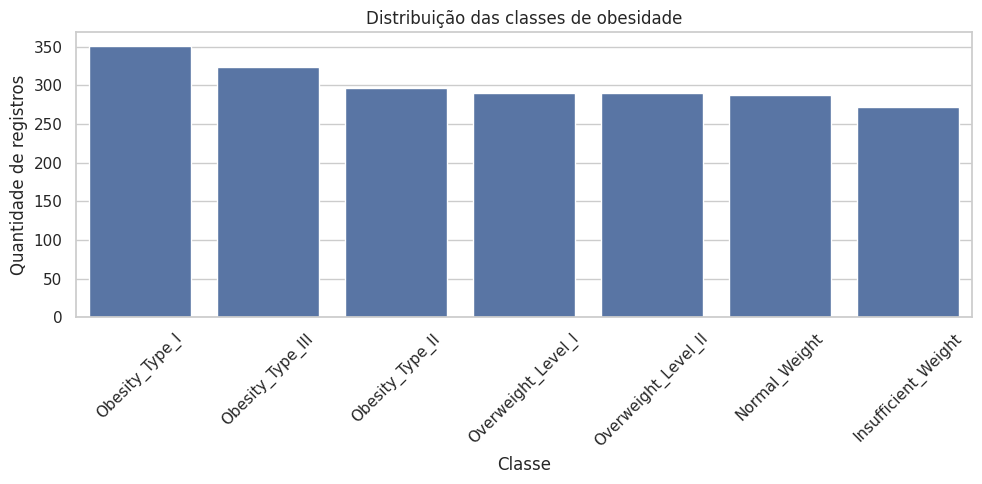

In [34]:
# Estilo visual dos gráficos
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x="NObeyesdad", order=dataset["NObeyesdad"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribuição das classes de obesidade")
plt.xlabel("Classe")
plt.ylabel("Quantidade de registros")
plt.tight_layout()
plt.show()

### 2.3 Conclusão da Análise Exploratória

O dataset está completo, com **2111 registros** e **sem valores ausentes**, o que elimina a necessidade de tratamento de dados faltantes.

As variáveis estão divididas entre **numéricas** (como idade, altura, peso, consumo de vegetais etc.) e **categóricas** (como gênero, transporte, histórico familiar). Algumas variáveis numéricas, apesar de representarem contagens ou frequência (ex: refeições ou atividades físicas), aparecem com casas decimais. Essas serão **arredondadas** e ajustadas no pré-processamento.

As variáveis `Height` e `Weight` não serão usadas no modelo, pois o foco é prever o nível de obesidade com base apenas em **hábitos e perfil demográfico**.

A variável alvo `NObeyesdad` contém **sete categorias bem distribuídas**, sendo a mais comum com 16,6% e a menos comum com 12,8%. Como não há desequilíbrio crítico, **não será necessário aplicar técnicas de balanceamento**.

**Resumo prático:**
- Os dados estão prontos para uso (sem nulos).
- Algumas colunas numéricas serão ajustadas por apresentarem valores decimais indevidos.
- As variáveis categóricas serão codificadas.
- `Height` e `Weight` serão excluídas.
- A variável alvo está bem distribuída entre as classes.

## 3 Preparação e Separação dos Dados

Nesta etapa, a variável alvo (`NObeyesdad`) foi codificada com `LabelEncoder`, transformando as classes em valores numéricos. Já as variáveis categóricas dos atributos preditores foram convertidas usando `OneHotEncoder`, para que pudessem ser interpretadas corretamente pelos modelos.

Também foi feita a separação entre os conjuntos de treino e teste, utilizando a técnica de *holdout*, com 80% dos dados para treino e 20% para teste. A amostragem foi estratificada, para manter a proporção das classes da variável alvo em ambas as partes.




### 3.1 Codificação das Variáveis Categóricas com One-Hot Encoding

As variáveis categóricas foram separadas em dois grupos:
- **Binárias** (com duas categorias), codificadas com `drop_first=True` para evitar redundância.
- **Multiclasse** (com três ou mais categorias), codificadas com `drop_first=False` para manter todas as categorias explícitas e evitar perda de informação.

Foi utilizada a técnica de **One-Hot Encoding** para transformar essas variáveis em colunas numéricas compatíveis com os algoritmos de machine learning.

In [71]:
# Cópia do dataset original
dataset_prep = dataset.copy()

# Exclusão de colunas que não serão utilizadas
dataset_prep = dataset_prep.drop(columns=['Height', 'Weight'])

# Lista de colunas discretas para arredondamento e conversão para int
colunas_float_discretas = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
dataset_prep[colunas_float_discretas] = dataset_prep[colunas_float_discretas].round().astype(int)

# Variáveis binárias (2 categorias)
colunas_binarias = ['Gender', 'FHWO', 'FAVC', 'SMOKE', 'SCC']
dataset_prep = pd.get_dummies(dataset_prep, columns=colunas_binarias, drop_first=True)

# Variáveis categóricas multiclasse (3+ categorias)
colunas_multiclasse = ['CAEC', 'CALC', 'MTRANS']
dataset_prep = pd.get_dummies(dataset_prep, columns=colunas_multiclasse, drop_first=False)

# Visualizando o resultado
dataset_prep.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,FHWO_yes,FAVC_yes,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,2,3,2,0,1,Normal_Weight,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,21,3,3,3,3,0,Normal_Weight,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,23,2,3,2,2,1,Normal_Weight,True,True,False,...,False,False,True,False,False,False,False,False,True,False
3,27,3,3,2,2,0,Overweight_Level_I,True,False,False,...,False,False,True,False,False,False,False,False,False,True
4,22,2,1,2,0,0,Overweight_Level_II,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [72]:
# Informações gerais
dataset_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           2111 non-null   int64 
 1   FCVC                          2111 non-null   int64 
 2   NCP                           2111 non-null   int64 
 3   CH2O                          2111 non-null   int64 
 4   FAF                           2111 non-null   int64 
 5   TUE                           2111 non-null   int64 
 6   NObeyesdad                    2111 non-null   object
 7   Gender_Male                   2111 non-null   bool  
 8   FHWO_yes                      2111 non-null   bool  
 9   FAVC_yes                      2111 non-null   bool  
 10  SMOKE_yes                     2111 non-null   bool  
 11  SCC_yes                       2111 non-null   bool  
 12  CAEC_Always                   2111 non-null   bool  
 13  CAEC_Frequently   

### 3.2 Conversão de Colunas Booleanas para Inteiro

Após a codificação das variáveis categóricas, algumas colunas foram geradas com o tipo `bool`. Para garantir a compatibilidade com os algoritmos de machine learning, essas colunas foram convertidas para o tipo `int`, onde `False` equivale a `0` e `True` a `1`.

In [73]:
# Verifica se há colunas com tipo booleano
colunas_booleanas = dataset_prep.select_dtypes(include='bool').columns

# Converte apenas essas colunas para inteiros
dataset_prep[colunas_booleanas] = dataset_prep[colunas_booleanas].astype(int)

# Verifica o resultado
dataset_prep.dtypes

,0
Age,int64
FCVC,int64
NCP,int64
CH2O,int64
FAF,int64
TUE,int64
NObeyesdad,object
Gender_Male,int64
FHWO_yes,int64
FAVC_yes,int64


### 3.3 Codificação da Variável Alvo e Separação dos Dados (Treino/Teste)

A variável alvo `NObeyesdad` foi codificada numericamente com o `LabelEncoder`, transformando as categorias de obesidade em valores inteiros entre 0 e 6.

Em seguida, os dados foram divididos em conjuntos de treino (80%) e teste (20%), mantendo a proporção original das classes com o parâmetro `stratify=y_encoded`.


In [74]:
# Configurações
test_size = 0.20
seed = 42  # Valor clássico usado por convenção e reprodutibilidade

# Separando atributos e alvo
X = dataset_prep.drop('NObeyesdad', axis=1)
y = dataset_prep['NObeyesdad']

# Codificando o alvo
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Exibindo as categorias e seus rótulos numéricos
classes = le.classes_
codigos = le.transform(classes)

# Mostrando o mapeamento de categorias para números
for classe, codigo in zip(classes, codigos):
    print(f"{classe} → {codigo}")

# Separação treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=test_size, random_state=seed, stratify=y_encoded
)

# Visualizando as formas dos conjuntos gerados
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Insufficient_Weight → 0
Normal_Weight → 1
Obesity_Type_I → 2
Obesity_Type_II → 3
Obesity_Type_III → 4
Overweight_Level_I → 5
Overweight_Level_II → 6
Tamanho do conjunto de treino: (1688, 24)
Tamanho do conjunto de teste: (423, 24)


### 3.4 Reorganização e Visualização do Dataset Preparado

Para facilitar a análise e visualização, as colunas do dataset foram reorganizadas respeitando a ordem original das variáveis (com exceção de `Height` e `Weight`, que foram removidas).


In [75]:
# Reorganizando as colunas do dataset_prep com base na ordem original (exceto Height e Weight, que foram removidos)
colunas_ordenadas = []

# Colunas que não devem ser usadas para reordenar
colunas_removidas = ['Height', 'Weight', 'NObeyesdad']

for col in dataset.columns:
    if col in colunas_removidas:
        continue
    elif dataset[col].dtype == 'object':
        dummies = [c for c in dataset_prep.columns if c.startswith(col + '_')]
        colunas_ordenadas.extend(dummies)
    else:
        colunas_ordenadas.append(col)

# Adiciona a variável alvo no final
colunas_ordenadas.append('NObeyesdad')
dataset_prep['NObeyesdad'] = y_encoded

# Reorganiza o dataset_prep
dataset_prep_ordenado = dataset_prep[colunas_ordenadas]

# Exibe as primeiras linhas do dataset reordenado
dataset_prep_ordenado.head()

,Gender_Male,Age,FHWO_yes,FAVC_yes,FCVC,NCP,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0,21,1,0,2,3,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,0,21,1,0,3,3,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
2,1,23,1,0,2,3,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3,1,27,0,0,3,3,0,0,1,0,...,0,1,0,0,0,0,0,0,1,5
4,1,22,0,0,2,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,6


In [76]:
# Cria o resumo de dados do dataset
resumo = []

for col in dataset_prep.columns:
    valores_unicos = dataset_prep[col].unique()
    tipo = dataset_prep[col].dtype
    not_null = dataset_prep[col].isnull().sum()
    qtd_valores = len(valores_unicos)
    amostra = valores_unicos[:10]
    resumo.append({
        'Coluna': col,
        'Tipo': tipo,
        'Valores Nulos': not_null,
        'Valores Únicos': qtd_valores,
        'Amostra de Valores': amostra
    })

# Cria e exibe a tabela
resumo_df = pd.DataFrame(resumo)
resumo_df

,Coluna,Tipo,Valores Nulos,Valores Únicos,Amostra de Valores
0,Age,int64,0,40,"[21, 23, 27, 22, 29, 24, 26, 41, 30, 52]"
1,FCVC,int64,0,3,"[2, 3, 1]"
2,NCP,int64,0,4,"[3, 1, 4, 2]"
3,CH2O,int64,0,3,"[2, 3, 1]"
4,FAF,int64,0,4,"[0, 3, 2, 1]"
5,TUE,int64,0,3,"[1, 0, 2]"
6,NObeyesdad,int64,0,7,"[1, 5, 6, 2, 0, 3, 4]"
7,Gender_Male,int64,0,2,"[0, 1]"
8,FHWO_yes,int64,0,2,"[1, 0]"
9,FAVC_yes,int64,0,2,"[0, 1]"


## 4 Modelagem e Avaliação dos Modelos

Neste bloco, com os dados prontos e separados, os algoritmos de classificação serão aplicados aos  dados e avaliados. Os modelos testados foram: KNN, Árvore de Decisão, Naive Bayes e SVM.


### 4.1 Avaliação com Dados Originais, Padronizados e Normalizados

Os modelos foram testados em três versões do dataset:
- Original (sem alteração)
- Padronizado (`StandardScaler`)
- Normalizado (`MinMaxScaler`)

As métricas analisadas foram: **acurácia, precisão macro, recall macro e F1-score macro** — sendo esta última a principal para comparação entre os modelos, por oferecer uma visão equilibrada do desempenho geral em problemas de classificação multiclasse.

In [77]:
# Métricas a serem avaliadas
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# Modelos a serem testados
modelos = [
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC(random_state=42))
]

# Transformações
escalas = [
    ('original', None),
    ('padronizado', StandardScaler()),
    ('normalizado', MinMaxScaler())
]

# Armazenamento dos resultados
nomes = []
resultados = []

# Avaliação
for nome_escala, escala in escalas:
    for nome_modelo, modelo in modelos:
        nome_pipeline = f"{nome_modelo} - {nome_escala}"
        print(f"🔄 Avaliando: {nome_pipeline}...")

        if escala:
            pipeline = Pipeline([
                ('scaler', escala),
                ('modelo', modelo)
            ])
        else:
            pipeline = Pipeline([
                ('modelo', modelo)
            ])

        # Avaliação com cross_validate
        scores = cross_validate(
            pipeline, X_train, y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring=scoring,
            return_train_score=False
        )

        # Calculando médias
        resultados.append({
            'Pipeline': nome_pipeline,
            'Acurácia Média': scores['test_accuracy'].mean(),
            'Precisão Média': scores['test_precision_macro'].mean(),
            'Revocação Média': scores['test_recall_macro'].mean(),
            'F1-score Médio': scores['test_f1_macro'].mean()
        })

print("✅ Avaliação concluída!")

🔄 Avaliando: KNN - original...
🔄 Avaliando: Decision Tree - original...
🔄 Avaliando: Naive Bayes - original...
🔄 Avaliando: SVM - original...
🔄 Avaliando: KNN - padronizado...
🔄 Avaliando: Decision Tree - padronizado...
🔄 Avaliando: Naive Bayes - padronizado...
🔄 Avaliando: SVM - padronizado...
🔄 Avaliando: KNN - normalizado...
🔄 Avaliando: Decision Tree - normalizado...
🔄 Avaliando: Naive Bayes - normalizado...
🔄 Avaliando: SVM - normalizado...
✅ Avaliação concluída!


In [80]:
# Criar DataFrame
resultados_df = pd.DataFrame(resultados).sort_values(by='F1-score Médio', ascending=False).reset_index(drop=True)
resultados_df


,Pipeline,Acurácia Média,Precisão Média,Revocação Média,F1-score Médio
0,Decision Tree - normalizado,0.755949,0.749707,0.751645,0.746977
1,Decision Tree - original,0.755357,0.748169,0.751024,0.745900
2,Decision Tree - padronizado,0.752399,0.745097,0.748106,0.742990
3,SVM - padronizado,0.736408,0.745405,0.734148,0.730519
4,KNN - padronizado,0.725141,0.724053,0.721376,0.714478
5,KNN - normalizado,0.704434,0.699620,0.699714,0.691363
6,KNN - original,0.703191,0.706883,0.696258,0.673804
7,SVM - normalizado,0.686644,0.704123,0.684059,0.672489
8,Naive Bayes - original,0.470992,0.490964,0.470879,0.403311
9,Naive Bayes - normalizado,0.455600,0.452670,0.456669,0.381698


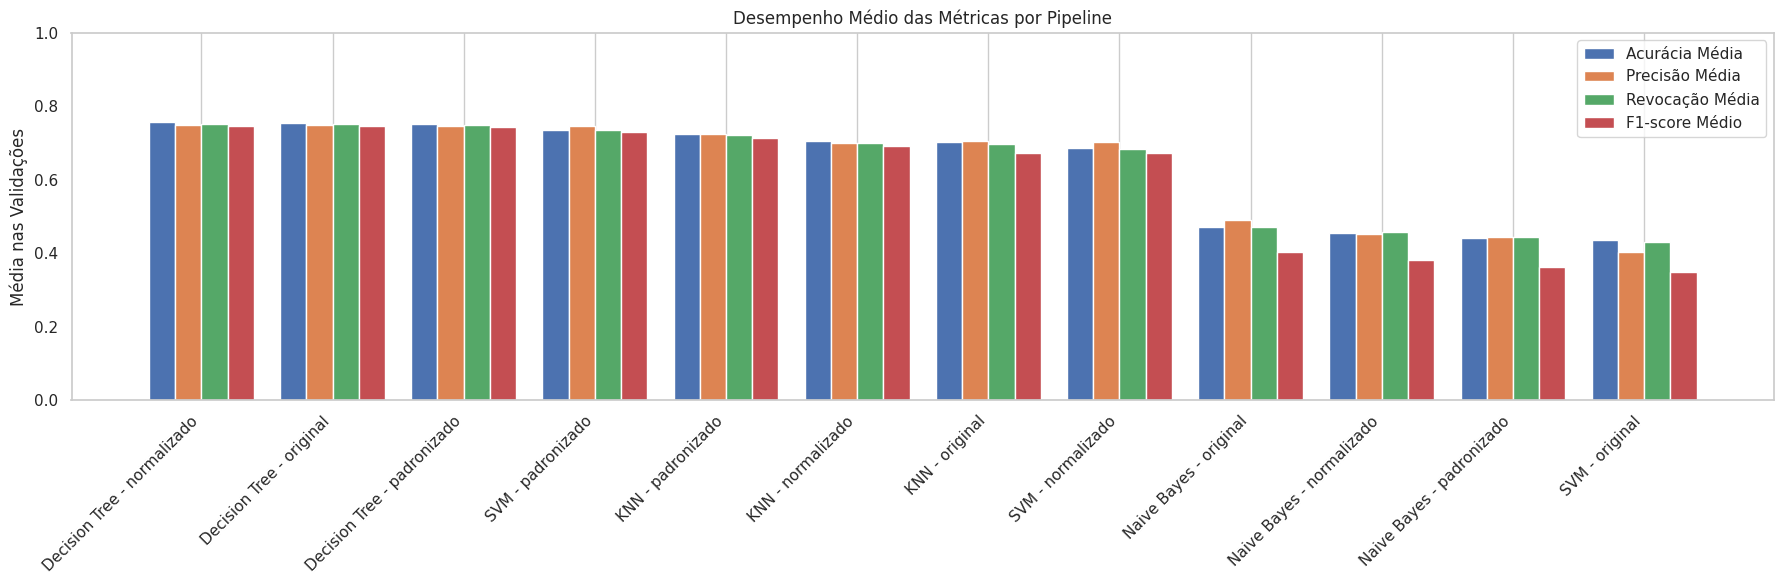

In [81]:
# Plotando as 4 métricas
plt.figure(figsize=(18, 6))
metricas = ['Acurácia Média', 'Precisão Média', 'Revocação Média', 'F1-score Médio']
largura_barra = 0.2
posicoes = range(len(resultados_df))

# Um grupo de barras por métrica
for i, metrica in enumerate(metricas):
    plt.bar(
        [p + i * largura_barra for p in posicoes],
        resultados_df[metrica],
        width=largura_barra,
        label=metrica
    )

plt.xticks(
    [p + 1.5 * largura_barra for p in posicoes],
    resultados_df['Pipeline'],
    rotation=45,
    ha='right'
)
plt.ylim(0, 1)
plt.ylabel("Média nas Validações")
plt.title("Desempenho Médio das Métricas por Pipeline")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 5 Otimização de Hiperparâmetros com GridSearchCV

Para identificar a melhor configuração para os modelos e permitir uma comparação mais justa de desempenho, foi usada a ferramenta `GridSearchCV`, utilizando **validação cruzada estratificada com 10 divisões** e a métrica **F1-score macro** como critério principal de avaliação. Essa métrica foi escolhida por ser mais adequada em problemas de classificação com múltiplas classes e classes com tamanhos semelhantes.

In [82]:
# Definição dos modelos e seus grids
modelos_parametros = {
    'KNN': (
        KNeighborsClassifier(),
        {
            'classifier__n_neighbors': [3, 5, 7, 9, 11],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
        }
    ),
    'Decision Tree': (
        DecisionTreeClassifier(random_state=42),
        {
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [5, 10, 15, 20, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    ),
    'Naive Bayes': (
        GaussianNB(),
        {
            'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
        }
    ),
    'SVM': (
        SVC(random_state=42),
        {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001]
        }
    )
}

# Escalas
escalas = {
    'original': None,
    'padronizado': StandardScaler(),
    'normalizado': MinMaxScaler()
}

# Armazenamento dos resultados
melhores_modelos = {}
resultados_otimizacao = []

for nome_escala, scaler in escalas.items():
    for nome_modelo, (modelo, param_grid) in modelos_parametros.items():
        print(f"🔍 Otimizando: {nome_modelo} com escala {nome_escala}")

        steps = []
        if scaler is not None:
            steps.append(('scaler', scaler))
        steps.append(('classifier', modelo))
        pipeline = Pipeline(steps)

        grid = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring='f1_macro',
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed),
            n_jobs=-1,
            verbose=1
        )

        grid.fit(X_train, y_train)
        print("Modelo: %s - Melhor: %f usando %s" % (nome_modelo, grid.best_score_, grid.best_params_))

        melhores_modelos[f"{nome_modelo} ({nome_escala})"] = grid.best_estimator_
        resultados_otimizacao.append({
            'Modelo': nome_modelo,
            'Escala': nome_escala,
            'Melhor F1-score': grid.best_score_,
            'Melhores Parâmetros': grid.best_params_
        })

# Resultados finais
df_resultados_otimizacao = pd.DataFrame(resultados_otimizacao)
df_resultados_otimizacao = df_resultados_otimizacao.sort_values(by='Melhor F1-score', ascending=False).reset_index(drop=True)

# Ajuste para exibir todo o conteúdo da coluna "Melhores Parâmetros"
pd.set_option('display.max_colwidth', None)

# Exibir resultados
df_resultados_otimizacao


🔍 Otimizando: KNN com escala original
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Modelo: KNN - Melhor: 0.724156 usando {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
🔍 Otimizando: Decision Tree com escala original
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Modelo: Decision Tree - Melhor: 0.738055 usando {'classifier__criterion': 'entropy', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
🔍 Otimizando: Naive Bayes com escala original
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Modelo: Naive Bayes - Melhor: 0.474341 usando {'classifier__var_smoothing': 1e-05}
🔍 Otimizando: SVM com escala original
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Modelo: SVM - Melhor: 0.772978 usando {'classifier__C': 10, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
🔍 Otimizando: KNN com escala padronizado
Fitting 5 folds for e

,Modelo,Escala,Melhor F1-score,Melhores Parâmetros
0,SVM,original,0.772978,"{'classifier__C': 10, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}"
1,KNN,padronizado,0.765236,"{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 11, 'classifier__weights': 'distance'}"
2,SVM,padronizado,0.762669,"{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}"
3,SVM,normalizado,0.754817,"{'classifier__C': 100, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}"
4,Decision Tree,padronizado,0.739774,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}"
5,Decision Tree,normalizado,0.739012,"{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}"
6,Decision Tree,original,0.738055,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}"
7,KNN,normalizado,0.737015,"{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 11, 'classifier__weights': 'distance'}"
8,KNN,original,0.724156,"{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}"
9,Naive Bayes,original,0.474341,{'classifier__var_smoothing': 1e-05}


In [84]:
print(X_train.columns.tolist())

['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Male', 'FHWO_yes', 'FAVC_yes', 'SMOKE_yes', 'SCC_yes', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']


In [83]:
X_train.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,FHWO_yes,FAVC_yes,SMOKE_yes,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
459,19,2,3,3,1,2,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
426,22,2,3,3,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
326,18,3,3,2,3,0,1,1,1,0,...,0,0,0,1,0,0,0,0,1,0
971,20,3,4,2,2,0,1,1,1,0,...,0,0,0,1,0,0,0,0,1,0
892,17,2,2,2,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [85]:
# Cria o resumo de dados do dataset
resumoX_train = []

for col in X_train.columns:
    valores_unicos = X_train[col].unique()
    tipo = X_train[col].dtype
    not_null = X_train[col].isnull().sum()
    qtd_valores = len(valores_unicos)
    amostra = valores_unicos[:5]
    resumoX_train.append({
        'Coluna': col,
        'Tipo': tipo,
        'Valores Nulos': not_null,
        'Valores Únicos': qtd_valores,
        'Amostra de Valores': amostra
    })

# Cria e exibe a tabela
resumo_df = pd.DataFrame(resumoX_train)
resumo_df

,Coluna,Tipo,Valores Nulos,Valores Únicos,Amostra de Valores
0,Age,int64,0,39,"[19, 22, 18, 20, 17]"
1,FCVC,int64,0,3,"[2, 3, 1]"
2,NCP,int64,0,4,"[3, 4, 2, 1]"
3,CH2O,int64,0,3,"[3, 2, 1]"
4,FAF,int64,0,4,"[1, 3, 2, 0]"
5,TUE,int64,0,3,"[2, 1, 0]"
6,Gender_Male,int64,0,2,"[1, 0]"
7,FHWO_yes,int64,0,2,"[1, 0]"
8,FAVC_yes,int64,0,2,"[1, 0]"
9,SMOKE_yes,int64,0,2,"[0, 1]"


## 6. Avaliação e Comparação de Resultados dos Modelos Treinados com os Diferentes Algoritmos


Após a etapa de validação cruzada com diferentes algoritmos e tipos de transformação (original, padronização e normalização), foram observadas diferenças claras de desempenho entre os modelos. A seguir, uma análise geral dos comportamentos observados **antes** e **depois da otimização dos hiperparâmetros**.

### 6.1 Desempenho Antes da Otimização

- **Decision Tree** apresentou desempenho altamente consistente, com F1-score médio em torno de **0.746**, independentemente da transformação aplicada. Isso confirma que o modelo **não depende da escala dos dados**, sendo naturalmente robusto.
- **SVM** teve desempenho mediano inicialmente (~0.730 com padronização), sugerindo que o modelo **poderia se beneficiar de uma otimização cuidadosa dos hiperparâmetros**.
- **KNN** apresentou sensibilidade à escala dos dados, obtendo o melhor desempenho com padronização (F1 ~0.714), mas resultados inferiores com dados normalizados e originais.
- **Naive Bayes** teve desempenho baixo em todas as situações (F1-score entre ~0.36 e ~0.40), indicando que a suposição de independência entre atributos pode não se adequar bem à estrutura do dataset.

### 6.2 Desempenho Após Otimização

| Modelo         | Melhor F1-score | Transformação | Melhores Parâmetros |
|----------------|------------------|----------------|----------------------|
| **SVM**         | **0.7730**        | Original        | `C=10`, `gamma=0.1`, `kernel='rbf'` |
| KNN            | 0.7652           | Padronizado     | `n_neighbors=11`, `weights='distance'`, `metric='manhattan'` |
| SVM            | 0.7627           | Padronizado     | `C=100`, `gamma=0.1`, `kernel='rbf'` |
| Decision Tree | 0.7398           | Padronizado     | `criterion='entropy'`, `max_depth=20`, `min_samples_split=2`, `min_samples_leaf=1` |
| Naive Bayes    | 0.4743           | Original        | `var_smoothing=1e-5` |

- O **SVM com dados originais foi o modelo com maior desempenho**, alcançando F1-score macro de **0.7730** após otimização cuidadosa dos hiperparâmetros.
- O **KNN melhorou significativamente**, especialmente com padronização e ajuste fino do número de vizinhos e da métrica de distância.
- A **Árvore de Decisão manteve sua estabilidade**, sendo uma boa opção alternativa com menor custo computacional.
- O **Naive Bayes**, mesmo após ajuste, continuou com desempenho abaixo dos demais.


### 6.3 Conclusão

O processo de avaliação e comparação permitiu confirmar que a escolha do modelo **não depende apenas do algoritmo**, mas também:
- da **escala dos dados**,
- da **qualidade da codificação das variáveis**,
- e da **otimização adequada dos hiperparâmetros**.

Com base nos resultados, o modelo escolhido para exportação foi o **SVM com dados originais**, por ter atingido o melhor desempenho entre todas as combinações avaliadas.

## 7. Exportação do Modelo

O modelo com melhor desempenho foi automaticamente identificado com base no maior **F1-score macro** obtido durante a etapa de otimização. O pipeline completo (incluindo pré-processamento e algoritmo) foi exportado com `joblib` para futura integração com a aplicação web.

**Modelo Exportado:** SVM (dados originais)  
**F1-score macro:** 0.7730  
**Arquivo gerado:** `modelo_otimizado_svm_original.pkl`





In [89]:
# Identificando o melhor modelo
melhor_linha = df_resultados_otimizacao.iloc[0]
nome_modelo = melhor_linha['Modelo']
nome_escala = melhor_linha['Escala']
melhor_f1 = melhor_linha['Melhor F1-score']

# Recuperando o pipeline já treinado
chave_modelo = f"{nome_modelo} ({nome_escala})"
modelo_final = melhores_modelos[chave_modelo]

# Salvando o modelo com joblib
nome_arquivo = f"modelo_otimizado_{nome_modelo.lower().replace(' ', '_')}_{nome_escala}.pkl"
joblib.dump(modelo_final, nome_arquivo)

# Exibindo confirmação
print(f"✅ Modelo final exportado com sucesso!")
print(f"🔍 Modelo: {nome_modelo} ({nome_escala})")
print(f"📈 F1-score: {melhor_f1:.4f}")
print(f"💾 Arquivo salvo: {nome_arquivo}")

✅ Modelo final exportado com sucesso!
🔍 Modelo: SVM (original)
📈 F1-score: 0.7730
💾 Arquivo salvo: modelo_otimizado_svm_original.pkl


## 8. Validação Final com o Conjunto de Teste

Após a otimização dos hiperparâmetros, o modelo com melhor desempenho foi o **SVM com dados originais**, que obteve um F1-score médio de **0.7730** durante a validação cruzada com 5 divisões.

Nesta etapa, o modelo otimizado foi avaliado com os dados de teste (`X_test`), que foram separados no início do projeto e **não participaram do treinamento nem da validação**. Essa avaliação é importante para medir a capacidade real de generalização do modelo.

### 8.1 Relatório de Classificação

📋 Relatório de Classificação (Conjunto de Teste):

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.89      0.89        54
      Normal_Weight       0.66      0.66      0.66        58
     Obesity_Type_I       0.80      0.79      0.79        70
    Obesity_Type_II       0.90      0.87      0.88        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.77      0.76      0.77        58
Overweight_Level_II       0.69      0.74      0.72        58

           accuracy                           0.81       423
          macro avg       0.81      0.81      0.81       423
       weighted avg       0.81      0.81      0.81       423



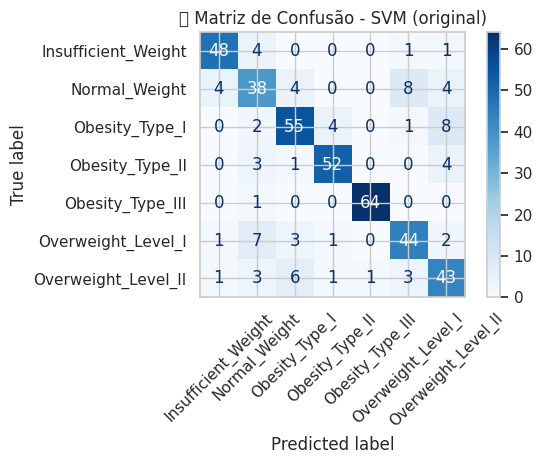

In [88]:
# Recuperando o melhor modelo com base no resultado da otimização
melhor_linha = df_resultados_otimizacao.iloc[0]
nome_modelo = melhor_linha['Modelo']
nome_escala = melhor_linha['Escala']
chave_modelo = f"{nome_modelo} ({nome_escala})"
modelo_final = melhores_modelos[chave_modelo]

# Predição no conjunto de teste
y_pred = modelo_final.predict(X_test)

# Relatório de classificação
print("📋 Relatório de Classificação (Conjunto de Teste):\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title(f"🔎 Matriz de Confusão - {nome_modelo} ({nome_escala})")
plt.tight_layout()
plt.show()

### 8.2 Análise dos Resultados no Conjunto de Teste

- **Acurácia geral:** 81%
- **F1-score macro:** 0.81
- **F1-score weighted:** 0.81

O modelo demonstrou desempenho equilibrado entre as classes, sendo capaz de diferenciar corretamente os diferentes níveis de obesidade e peso com boa precisão.

Verificando os resultados por classe:

- **Obesity_Type_III** apresentou desempenho excelente (F1-score **0.98**), com altíssima precisão e revocação;
- **Obesity_Type_II**, **Obesity_Type_I** e **Insufficient_Weight** também mostraram F1-scores robustos (entre **0.77** e **0.89**);
- **Normal_Weight** foi a classe com menor desempenho (F1-score **0.66**), o que é comum em classificações multiclasse com classes adjacentes no espectro clínico;
- As classes **Overweight_Level_I** e **Overweight_Level_II** ficaram na faixa de **0.72 a 0.77**, resultado considerado satisfatório para problemas multiclasse.

A partir dessa análise, é possível concluir que a performance do modelo no conjunto de teste confirma sua **capacidade de generalização**, com desempenho consistente mesmo diante de classes com fronteiras clínicas mais sutis. A utilização de:

- **validação cruzada estratificada**,
- **otimização de hiperparâmetros**, e
- **avaliação com dados não vistos durante o treinamento**

reforça a escolha da **SVM com dados originais** como modelo final para predição do nível de obesidade com base em informações clínicas e comportamentais.

## 9. Considerações Finais

O projeto desenvolvido permitiu aplicar de forma prática os conceitos fundamentais de engenharia de software para sistemas inteligentes, abordando todas as etapas de um fluxo de machine learning supervisionado. Desde o carregamento e análise exploratória dos dados até a avaliação final no conjunto de teste, foi possível construir uma solução robusta e confiável para a **classificação de níveis de obesidade**.

Diversos algoritmos foram testados, com destaque para o modelo **SVM com dados originais**, que obteve o melhor desempenho após a otimização de seus hiperparâmetros. O modelo final atingiu um **F1-score macro de 0.81 no conjunto de teste**, demonstrando boa capacidade de generalização para um problema multiclasse.

Além disso, todas as boas práticas foram aplicadas: separação entre treino e teste, validação cruzada estratificada, codificação de variáveis categóricas, tratamento de inconsistências nos dados, avaliação com múltiplas métricas e exportação do modelo treinado.